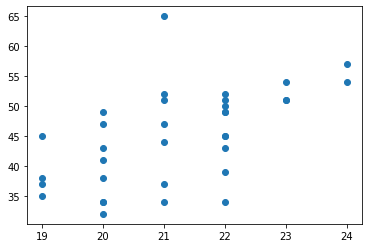

In [ ]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
df=pd.read_csv('/content/restaurants.csv')
x=df['Food_Quality']
y=df['Price']
plt.scatter(x,y)
plt.show()

In [ ]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     15.15
Date:                Thu, 05 May 2022   Prob (F-statistic):           0.000474
Time:                        08:07:01   Log-Likelihood:                -111.50
No. Observations:                  34   AIC:                             227.0
Df Residuals:                      32   BIC:                             230.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.9019     17.718     -1.349   

In [ ]:
sm.stats.linear_rainbow(model)

(3.95352909410105, 0.0051865838644822495)

In [ ]:
model.params

const          -23.901869
Food_Quality     3.249533
dtype: float64

In [ ]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
x=x.values
y=y.values

In [ ]:
type(x)
type(y)

numpy.ndarray

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_training_set,x_testing_set,y_training_set,y_testing_set=train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_training_set,y_training_set)

LinearRegression()

In [ ]:
#the coefficients
print('Coefficients:/n',regressor.coef_)

Coefficients:/n [0.         2.84248788]


In [ ]:
regressor.intercept_

-15.569466882067843

In [ ]:
#predicting the test set results
y_pred=regressor.predict(x_testing_set)
y_pred

array([44.12277868, 49.80775444, 38.43780291, 52.65024233, 44.12277868,
       46.96526656, 44.12277868])

In [ ]:
print("Mean squared error:",sklearn.metrics.mean_squared_error(y_testing_set,y_pred))

Mean squared error: 29.402488957458


In [ ]:

# Explained variance score: 1 is perfect prediction 
print('Variance score:', sklearn.metrics.r2_score (y_testing_set, y_pred))

Variance score: 0.5352509809950187


In [ ]:
# compare actual data with predicted value
import pandas as pd
y_test=pd.DataFrame(y_testing_set)
y_prediction=pd.DataFrame(y_pred)

comparison=pd.concat([y_test,y_prediction],axis=1)
comparison

,Price,0
0,NaN,44.122779
1,NaN,49.807754
2,34.0,38.437803
3,NaN,52.650242
4,NaN,44.122779
5,NaN,46.965267
6,NaN,44.122779
11,47.0,NaN
17,57.0,NaN
20,54.0,NaN


In [ ]:
comparison.to_csv("results.csv")